In [1]:
import synpivimage as spi
from synpivimage import noise
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cfg = spi.config.SynPivConfig(
    ny=21,
    nx=21,
    bit_depth=8,
    dark_noise=0,
    image_particle_peak_count=150,
    laser_shape_factor=2,
    laser_width=2,
    noise_baseline=0,
    particle_number=1,
    particle_position_file=None,
    particle_size_illumination_dependency=True,
    particle_size_mean=2.5,
    particle_size_std=1.0,
    qe=1.,
    sensitivity=1.,
    shot_noise=True,
    square_image=True)

In [3]:
img, _, _ = spi.generate_image(
    cfg,
    particle_data=spi.ParticleInfo(x=cfg.nx // 2,y=cfg.nx // 2,z=0,size=2.5)
)

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_img(_img, title):
    fig, axs = plt.subplots(1, 3, figsize=(9, 3.5))
    plt.suptitle(title)
    
    im = axs[0].imshow(_img, cmap='gray', vmax=2**cfg.bit_depth)
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = plt.colorbar(im, cax=cax)
    
    axs[1].hist(img.ravel(), bins=20, density=True)
    axs[1].set_xlim(0, 2**cfg.bit_depth)

    asp = np.diff(axs[1].get_xlim())[0] / np.diff(axs[1].get_ylim())[0]
    axs[1].set_aspect(asp)
    
    axs[2].plot(np.arange(0, cfg.nx, 1), _img[cfg.ny // 2, :])
    axs[2].set_ylim(0, 2**cfg.bit_depth)

    asp = np.diff(axs[2].get_xlim())[0] / np.diff(axs[2].get_ylim())[0]
    axs[2].set_aspect(asp)
    
    plt.tight_layout()
    plt.show()

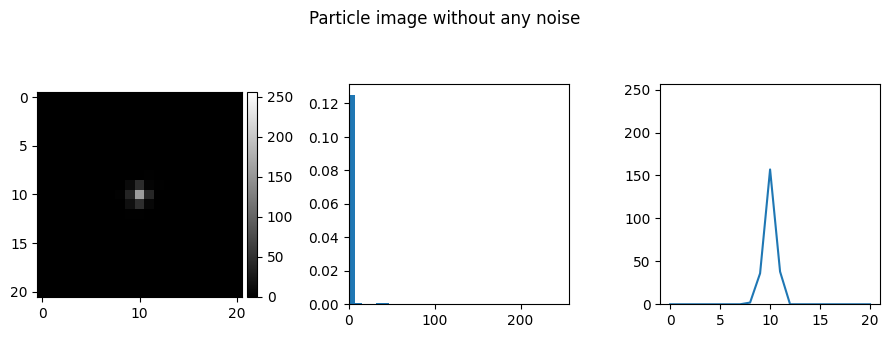

In [5]:
plot_img(img, 'Particle image without any noise')
print('max count: ', img.max())

max count:  200


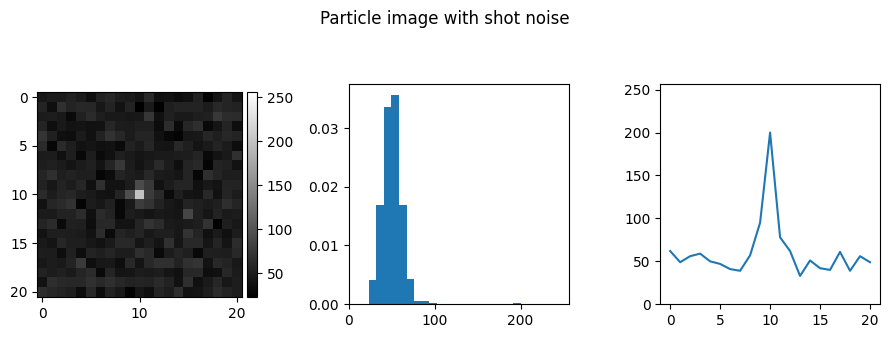

In [11]:
cfg.shot_noise = True

img, _, _ = spi.generate_image(
    cfg,
    particle_data=spi.ParticleInfo(x=cfg.nx // 2,y=cfg.nx // 2,z=0,size=2.5)
)
print('max count: ', img.max())
plot_img(img, 'Particle image with shot noise')

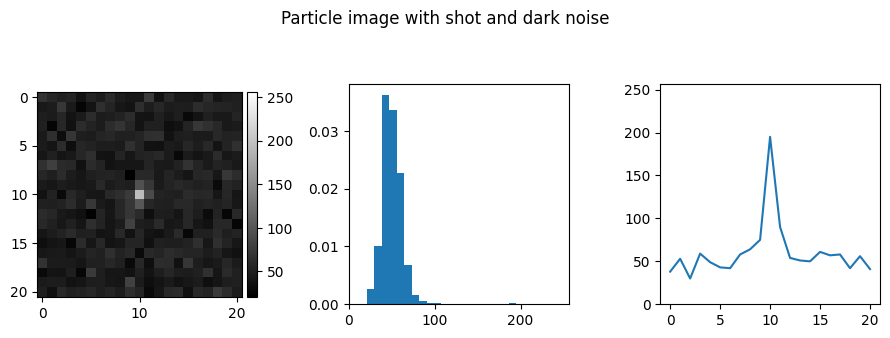

In [10]:
cfg.shot_noise = True
cfg.dark_noise = 10  # std of gaussian noise
cfg.noise_baseline = 50 # mean of gaussian noise

img, _, _ = spi.generate_image(
    cfg,
    particle_data=spi.ParticleInfo(x=cfg.nx // 2,y=cfg.nx // 2,z=0,size=2.5)
)
plot_img(img, 'Particle image with shot and dark noise')